# MNIST -  CNN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.4.0'

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Data Preprocessing

In [5]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Keras Modeling

### Model Define

#### Feature Extraction Layer (CNN)

In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()

# CNN Layer
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Classification Layer (DNN)

In [10]:
# DNN Layer
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Model Compile

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Fit

In [13]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 9ms/step - loss: 0.5773 - accuracy: 0.8256 - val_loss: 0.0730 - val_accuracy: 0.9787
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0523 - val_accuracy: 0.9852
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0363 - val_accuracy: 0.9904

375/375 [==============================] - 3s 7ms/step - loss: 7.4184e-04 - accuracy: 0.9999 - val_loss: 0.1416 - val_accuracy: 0.9908
Epoch 58/100
375/375 [==============================] - 3s 8ms/step - loss: 6.4501e-04 - accuracy: 0.9999 - val_loss: 0.1470 - val_accuracy: 0.9905
Epoch 59/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1497 - val_accuracy: 0.9908
Epoch 60/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1313 - val_accuracy: 0.9912
Epoch 61/100
375/375 [==============================] - 3s 7ms/step - loss: 5.5103e-04 - accuracy: 0.9998 - val_loss: 0.1303 - val_accuracy: 0.9918
Epoch 62/100
375/375 [==============================] - 3s 8ms/step - loss: 5.9228e-04 - accuracy: 0.9998 - val_loss: 0.1541 - val_accuracy: 0.9913
Epoch 63/100
375/375 [==============================] - 3s 8ms/step - loss: 9.1384e-04 - accuracy: 0.9998 - val_loss: 0.1394 - val_ac

### Visualization

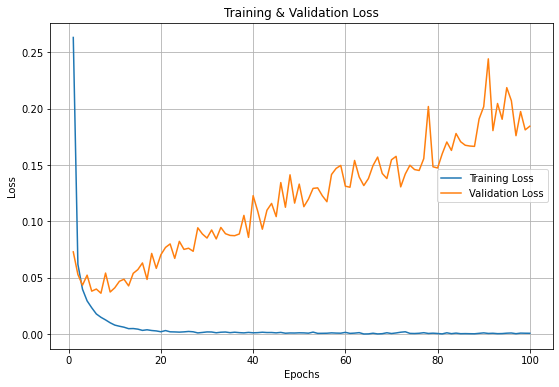

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

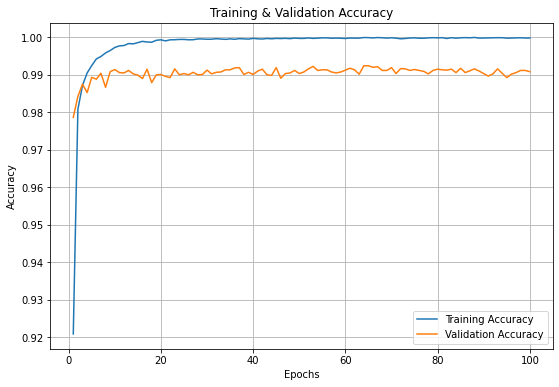

In [15]:
epochs = range(1, len(Hist_mnist.history['accuracy']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['accuracy'])
plt.plot(epochs, Hist_mnist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### Model Evaluate

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1304 - accuracy: 0.9932
Loss : 0.13044
Accuracy : 0.99320
